# Capítulo 12. Regresión linear usando Gradient Descent

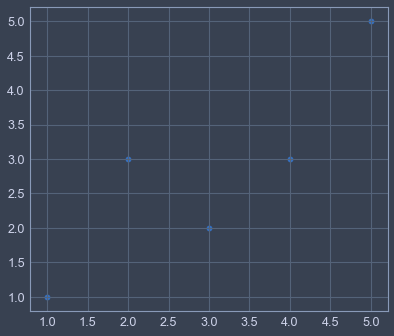

In [1]:
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

from numpy import array
from matplotlib import pyplot 

x = array([1, 2, 4, 3, 5])
y = array([1, 3, 3, 2, 5])

pyplot.scatter(x, y)
pyplot.show()

In [2]:
from numpy import sqrt, zeros

class SimpleLinearRegression:
    
    def __init__(self, x, y):
        "Class to calculate the simple linear regression y = B0 + B1 * x"
        self.x = x
        self.y = y
        
        self.b0 = 0.
        self.b1 = 0.
        
        self.rmse = 0. # Root Mean Squared Error
        
    def fit(self, alpha, epochs):
        '''Fit by Stochastic Gradient Descent'''    
        
        self.error = zeros(epochs)
        
        for i in range(epochs):
            self.b0, self.b1 = self._epoch(self.b0, self.b1, alpha)
            self.predicted_y = self.predict(self.x)
            self.error[i] = self._calculate_rmse()
        
        self.rmse = self.error[-1]
            
    def _epoch(self, b0, b1, alpha):
        for i in range(self.y.size):
            prediction = b0 + b1 * self.x[i]
            error = prediction - self.y[i]
            b0 = b0 - alpha * error
            b1 = b1 - alpha * error * self.x[i]
            
        return (b0, b1)
    
    def _calculate_rmse(self):
        "Calculate the Root Mean Squared Error or RMSE"
        error = self.predicted_y - self.y  # Calculate the error from predicted y
        squared_error = error ** 2         # Calculate the squared error
        n = y.size                         # n = size of the dataset
        
        return sqrt(sum(squared_error) / n)
    
    def predict(self, x):
        return x * self.b1 + self.b0

In [3]:
slr = SimpleLinearRegression(x, y)
slr.fit(0.01, 20)

In [4]:
slr.b0

0.2612503071930508

In [5]:
slr.b1

0.8491869862922873

In [6]:
slr.rmse

0.6963593595628554

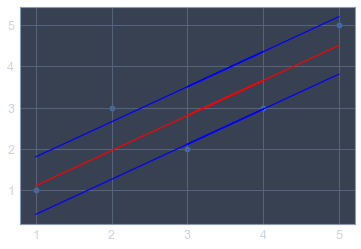

In [7]:
pyplot.scatter(x, y)
pyplot.plot(x, slr.predicted_y, color= 'red')
pyplot.plot(x, slr.predicted_y + slr.rmse, color= 'blue')
pyplot.plot(x, slr.predicted_y - slr.rmse, color= 'blue')
pyplot.show()

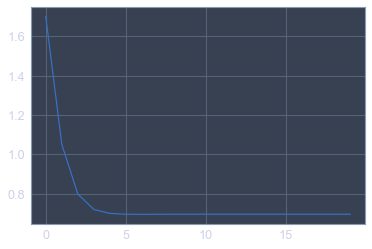

In [8]:
pyplot.plot(slr.error)
pyplot.show()